## Comparação com experiência ($N=3$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Soluções numéricas ###

In [2]:
def rhs(t, y, k, m, g, N, l0):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = g + k/m * ( x[1] - x[0] - l0 )
    vdot[1:-1] = g + k/m * ( x[2:] - 2*x[1:-1] + x[:-2] )
    vdot[-1] = g - k/m * (x[-1] - x[-2] - l0)
    return np.hstack((xdot, vdot))

In [3]:
N = 3
KK = 0.4399
k = KK * (N - 1)
L0 = 0.4639
l0 = L0 / (N - 1)
g = 9.81
m = 56.6E-3

In [4]:
i = np.arange(N)
x0 = i*(l0+ (N-(i+1)/2)*m*g/k)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))
soluc = solve_ivp(rhs, [0, 0.4], y0, args=[k, m, g, N, l0], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))
pxan = np.polyfit(tn,xn[0],7)
pxbn = np.polyfit(tn,xn[1],7)
pxcn = np.polyfit(tn,xn[2],7)
xan = lambda t: np.polyval(pxan, t)
xbn = lambda t: np.polyval(pxbn, t)
xcn = lambda t: np.polyval(pxcn, t)

### Observações ###

In [5]:
tl,xall,xbll,xcll = np.loadtxt(
    "/home/ljma/MEOCloud/fis/2024/fslinky/lab_data/video_data/20231128_DSC_1763_N3.txt",
    unpack=True)

In [6]:
pxal = np.polyfit(tl, xall, 7)
pxbl = np.polyfit(tl, xbll, 7)
pxcl = np.polyfit(tl, xcll, 7)
xal = lambda t: np.polyval(pxal, t)
xbl = lambda t: np.polyval(pxbl, t)
xcl = lambda t: np.polyval(pxcl, t)

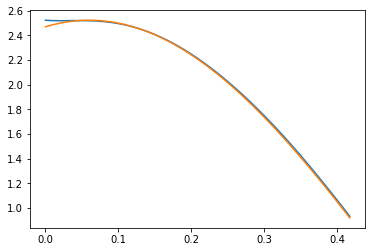

In [7]:
plt.plot(tl, xal(tl), tl, xal(tl[0])-xan(tl-0.06));

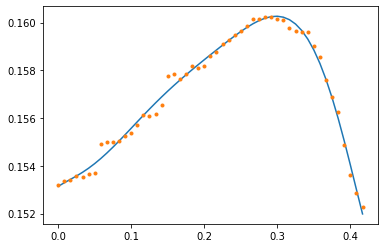

In [10]:
plt.plot(tl, xcl(tl),tl,xcll,'.');#, tl, xbl(tl[0])+1.5-xbn(tl-0.06));